In [1]:
import pandas as pd

df = pd.read_csv("dataNoWeather.csv", index_col=0)

df.index = pd.to_datetime(df.index)
df.head()

,Energia,Dlug. dnia,Typ dnia,Pora roku
Data czas,,,,
2015-09-01 00:00:00,122.772,13.75,1,3
2015-09-01 01:00:00,38.860,13.75,1,3
2015-09-01 02:00:00,39.401,13.75,1,3
2015-09-01 03:00:00,76.393,13.75,1,3
2015-09-01 04:00:00,317.443,13.75,1,3


In [2]:
y = df["Energia"].resample('W').sum()

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(y, lags=40)

<Figure size 640x480 with 1 Axes>

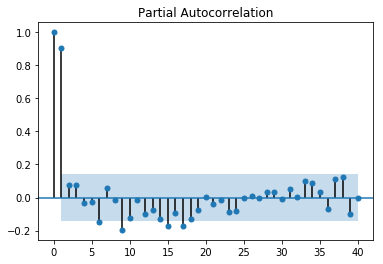

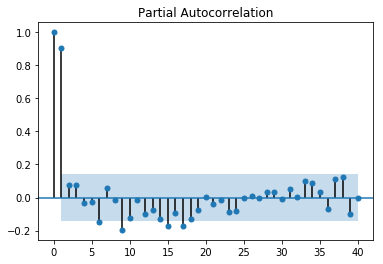

In [4]:
sm.graphics.tsa.plot_pacf(y, lags=40)

In [5]:
y['2018-06-03':].head()

Data czas
2018-06-03     6375.475
2018-06-10    28729.217
2018-06-17    34439.043
2018-06-24    35119.070
2018-07-01    35277.835
Freq: W-SUN, Name: Energia, dtype: float64

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6404      0.054     11.764      0.000       0.534       0.747
ar.S.L52      -0.5988      0.090     -6.625      0.000      -0.776      -0.422
sigma2       1.56e+10   4.31e-13   3.61e+22      0.000    1.56e+10    1.56e+10


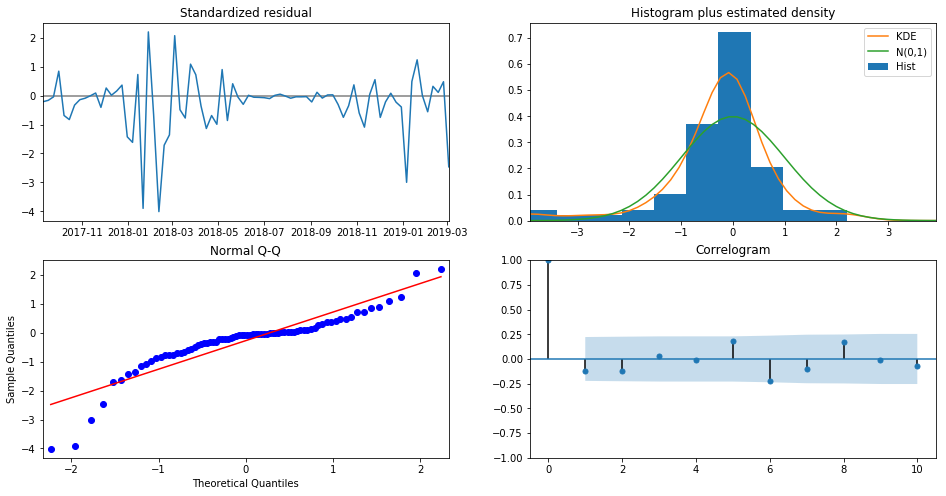

In [6]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(model)
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()

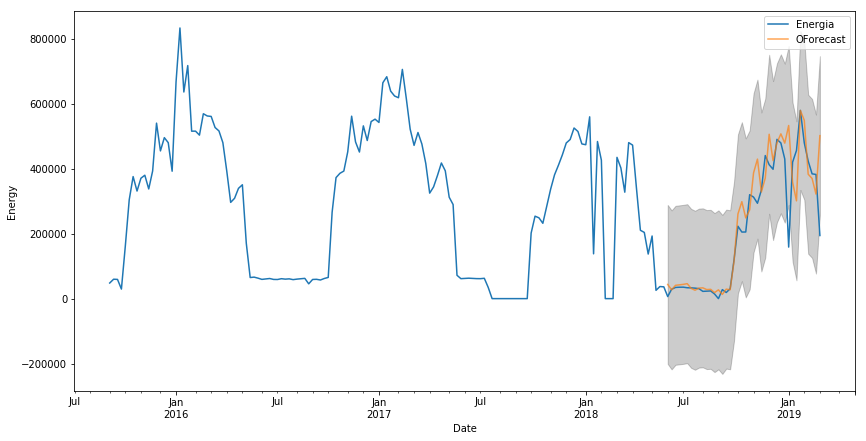

In [7]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-03'), dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='Energia')
pred.predicted_mean.plot(ax=ax, label='OForecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.show()

In [8]:
import numpy as np

y_forecasted = pred.predicted_mean
y_truth = y['2018-06-03':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('Energy varies from 0 to {}'.format(y.max()))

The Mean Squared Error of our forecasts is 8292748668.72
The Root Mean Squared Error of our forecasts is 91064.53
Energy varies from 0 to 833285.675


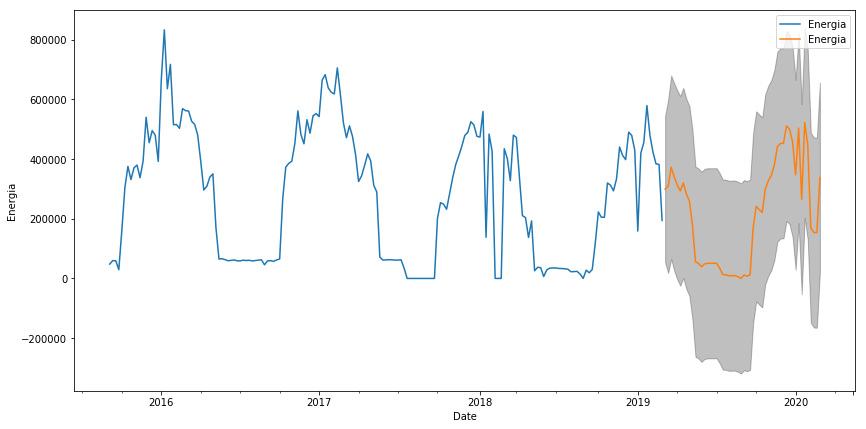

In [9]:
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Energia', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Energia')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Energia')

plt.legend()
plt.show()